<a href="https://colab.research.google.com/github/freya9711/ARIMA-dissertation/blob/main/CatnwellF_170691367_ARIMA_Model_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**ARMIMA MODEL**

Importing libraries

In [ ]:
pip install yfinance

     |████████████████████████████████| 6.3 MB 6.5 MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.63-py2.py3-none-any.whl size=23918 sha256=592821751f786889a70a83361d0a83a64417378303b3f483299411f3da26a5a6
  Stored in directory: /root/.cache/pip/wheels/fe/87/8b/7ec24486e001d3926537f5f7801f57a74d181be25b11157983
Successfully built yfinance
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import numpy as np 
import pandas as pd 
import os
from subprocess import check_output
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import yfinance as yf
from statsmodels.tsa.stattools import acf

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing the data

In [ ]:
#Downloading historical stock prices from yahoo finance
aData =yf.download("^OEX", start = '2017-01-01', interval='1wk', end='2019-12-31')

[*********************100%***********************]  1 of 1 completed


In [ ]:
aData.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-01,997.030029,1010.260010,994.789978,1008.150024,1008.150024,14637130000
2017-01-08,1006.669983,1009.429993,998.299988,1006.590027,1006.590027,17020210000
2017-01-15,1003.539978,1005.640015,997.900024,1003.039978,1003.039978,13591180000
2017-01-22,1001.309998,1014.289978,997.090027,1012.929993,1012.929993,17555940000
2017-01-29,1009.150024,1014.049988,999.950012,1013.690002,1013.690002,19001010000


Plotting the Adjusted close value

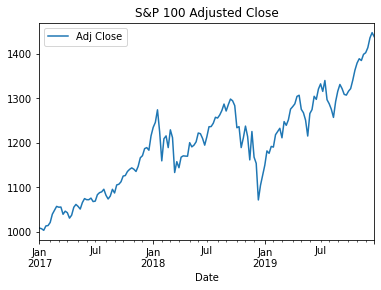

In [ ]:
aData[['Adj Close']].plot()
plt.title("S&P 100 Adjusted Close")
plt.show()

Checking the data 

In [ ]:
aData.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [ ]:
aData.reset_index(level=0, inplace=True)

In [ ]:
aData['Date'].dt.year.value_counts()

2017    53
2019    52
2018    52
Name: Date, dtype: int64

Find the p value to see if dataset is non stationary 

In [ ]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(aData['Adj Close'].dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.922104
p-value: 0.780606


Find order value to make dataset stationary 

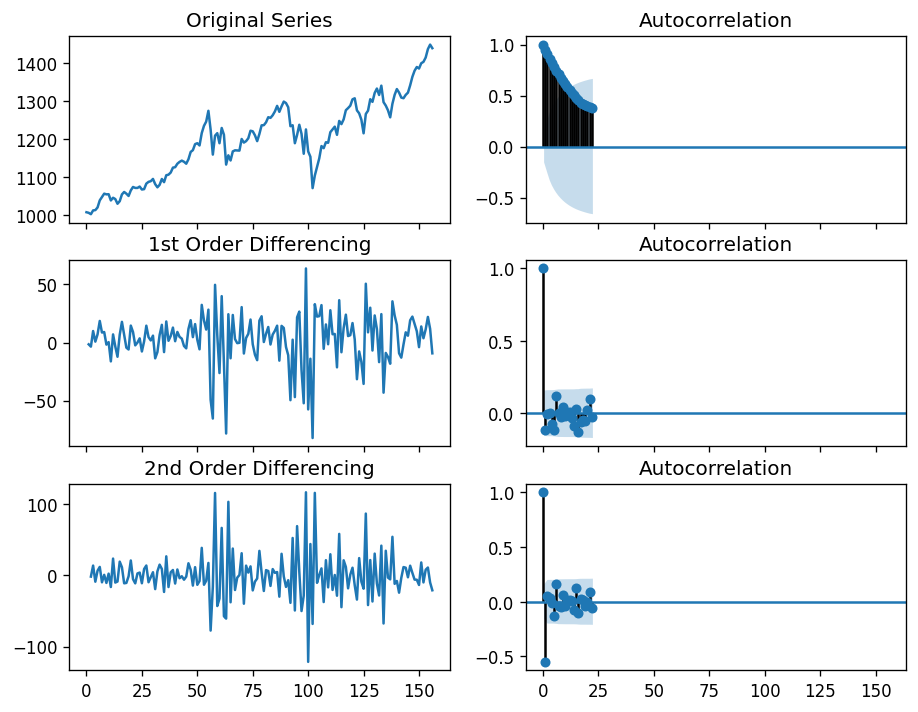

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(aData['Adj Close']); axes[0, 0].set_title('Original Series')
plot_acf(aData['Adj Close'], ax=axes[0, 1])

# 1st Differencing graph
axes[1, 0].plot(aData['Adj Close'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(aData['Adj Close'].diff().dropna(), ax=axes[1, 1])

# 2nd Differencing graph
axes[2, 0].plot(aData['Adj Close'].diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(aData['Adj Close'].diff().diff().dropna(), ax=axes[2, 1])

plt.show()

PACF plot

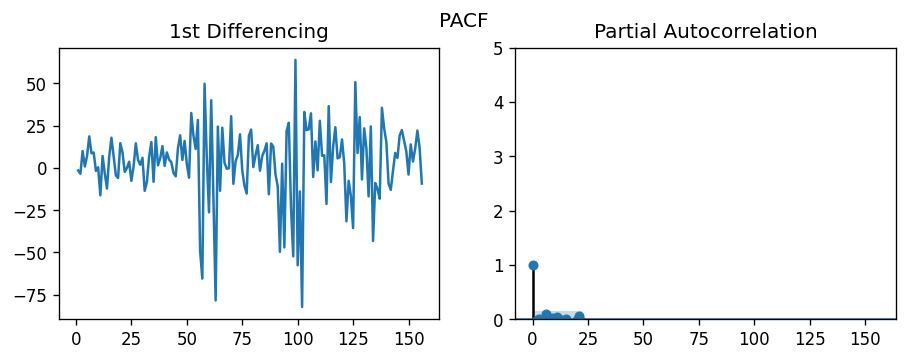

In [ ]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(aData['Adj Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(aData['Adj Close'].diff().dropna(), ax=axes[1])
fig.suptitle("PACF")
plt.show()

ACF plot

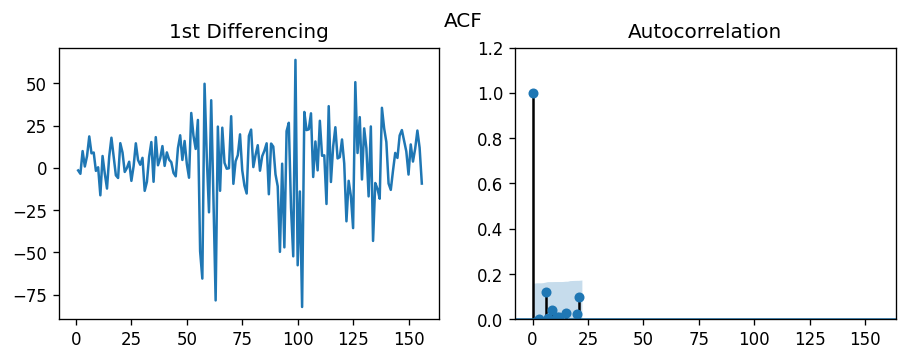

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(aData['Adj Close'].diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(aData['Adj Close'].diff().dropna(), ax=axes[1])
fig.suptitle("ACF")
plt.show()

**Implementing the model**

using order value of 1,1,1

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,0 ARIMA Model
model = ARIMA(aData['Adj Close'], order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                  156
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -699.595
Method:                       css-mle   S.D. of innovations             21.297
Date:                Mon, 13 Sep 2021   AIC                           1407.191
Time:                        15:26:32   BIC                           1419.390
Sample:                             1   HQIC                          1412.146
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.2621      0.325      6.968      0.000       1.626       2.898
ar.L1.D.Adj Close     0.8997      0.039     23.079      0.000       0.823       0.976
ma.L1.D.Adj Close    -1.

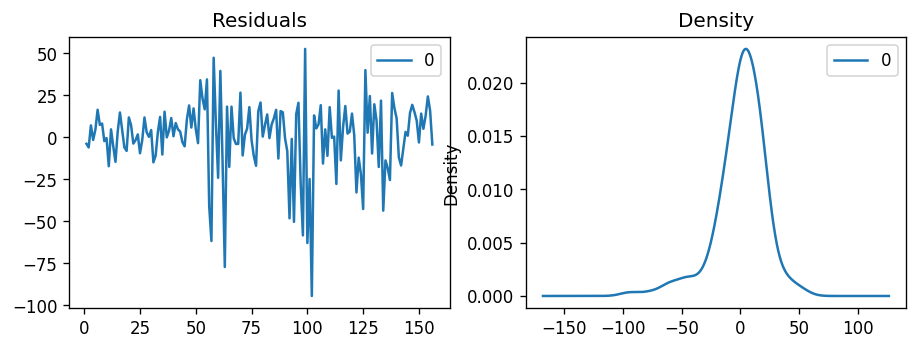

In [ ]:
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

plotting Actual vs Fitted

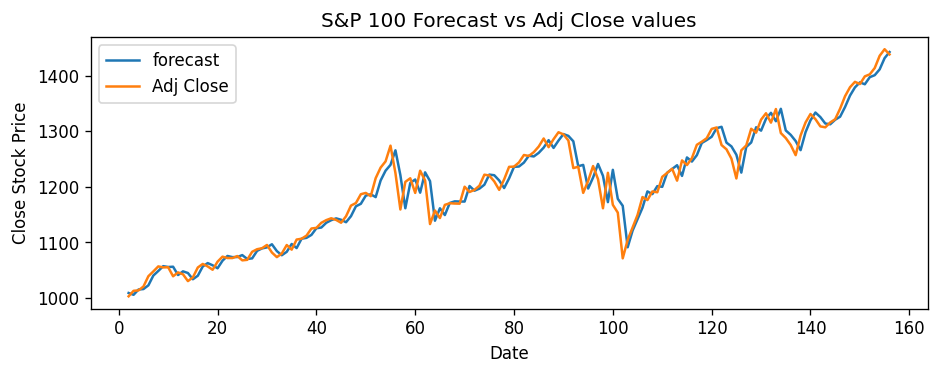

In [ ]:
model_fit.plot_predict(dynamic=False)
plt.title('S&P 100 Forecast vs Adj Close values')
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

Backtesting the data

In [ ]:
train = aData['Adj Close'][:78]
test = aData['Adj Close'][78:]

trying new orde value

In [ ]:
# Trying differnt Build Model 
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                   77
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -332.215
Method:                       css-mle   S.D. of innovations             17.826
Date:                Mon, 13 Sep 2021   AIC                            672.430
Time:                        15:26:32   BIC                            681.806
Sample:                             1   HQIC                           676.180
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.7407      0.377      7.273      0.000       2.002       3.479
ar.L1.D.Adj Close     0.7919      0.075     10.503      0.000       0.644       0.940
ma.L1.D.Adj Close    -1.

Plotting order value of 1,1,0

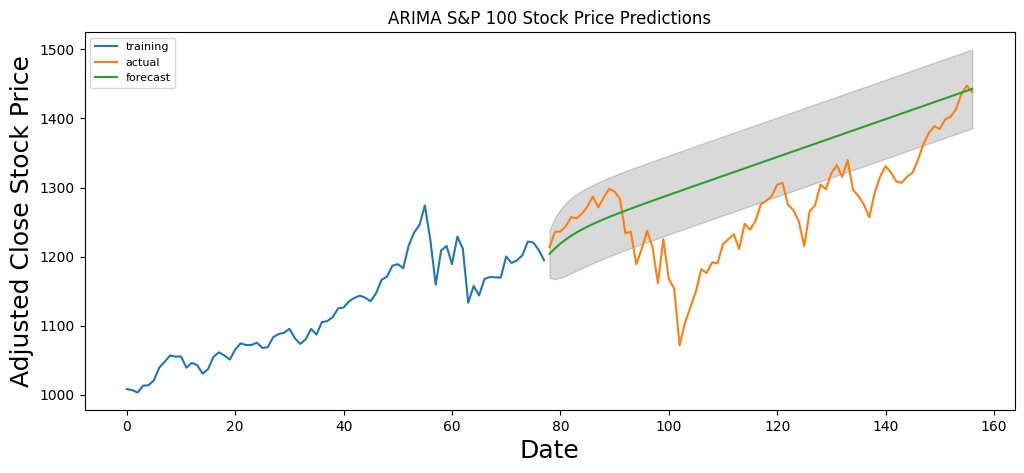

In [ ]:
# Build Model 
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(79, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('ARIMA S&P 100 Stock Price Predictions')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adjusted Close Stock Price", fontsize=18)
plt.show()

Accuracy metrics for order value of 1,1,1

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.8929654906678147,
 'corr': 0.6730959642614338,
 'mae': 71.78786910423851,
 'mape': 0.05811521266867433,
 'me': 62.57863452399633,
 'minmax': 0.05371204104795768,
 'mpe': 0.05088320100806292,
 'rmse': 84.73208768580972}

trail and error to see which one is the best

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                   77
Model:                 ARIMA(1, 1, 0)   Log Likelihood                -334.949
Method:                       css-mle   S.D. of innovations             18.746
Date:                Mon, 13 Sep 2021   AIC                            675.897
Time:                        15:26:33   BIC                            682.929
Sample:                             1   HQIC                           678.710
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.4469      1.936      1.264      0.210      -1.347       6.241
ar.L1.D.Adj Close    -0.1051      0.113     -0.928      0.357      -0.327       0.117
                        

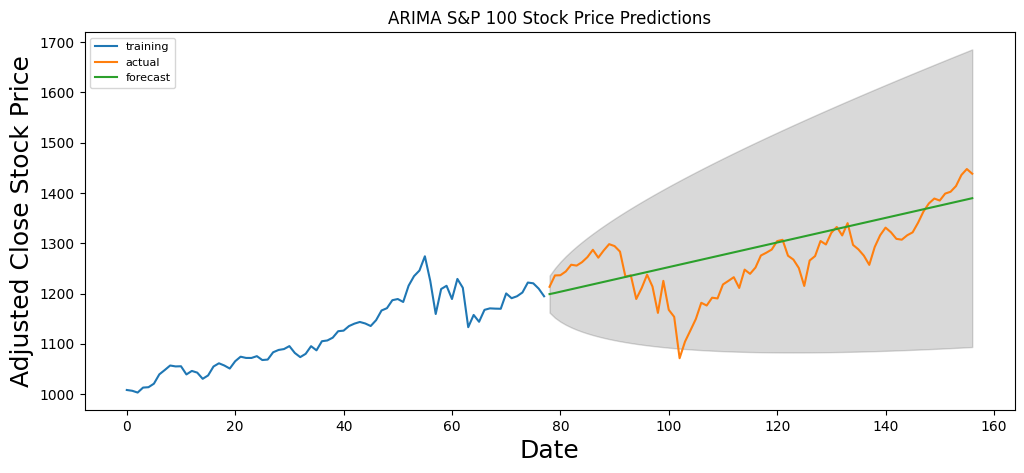

In [ ]:
# Build Model
model = ARIMA(train, order=(1, 1, 0))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(79, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('ARIMA S&P 100 Stock Price Predictions')
plt.legend(loc='upper left', fontsize=8)
plt.xlabel("Date", fontsize=18)
plt.ylabel("Adjusted Close Stock Price", fontsize=18)
plt.show()

order values 1,1,0 Accuracy metrics

In [ ]:
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    mse = np.mean((forecast - actual)**2)
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'mse':mse, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


{'acf1': 0.8852545883946862,
 'corr': 0.6901216886367227,
 'mae': 47.061516863862494,
 'mape': 0.038226688934996464,
 'me': 22.202411412878224,
 'minmax': 0.036342461543425686,
 'mpe': 0.019259464574219384,
 'mse': 3428.334562435705,
 'rmse': 58.55198171228455}

In [ ]:
y_pred = fc
y_test = test.values
print(y_test.shape, y_pred.shape)

# # Mean Absolute Error (MAE)
MAE = np.mean(abs(y_pred - y_test))
print('Mean Absolute Error (MAE): ' + str(np.round(MAE, 2)))

# Median Absolute Error (MedAE)
MEDAE = np.median(abs(y_pred - y_test))
print('Median Absolute Error (MedAE): ' + str(np.round(MEDAE, 2)))

# Mean Squared Error (MSE)
MSE = np.square(np.subtract(y_pred, y_test)).mean()
print('Mean Squared Error (MSE): ' + str(np.round(MSE, 2)))

# Root Mean Squarred Error (RMSE) 
RMSE = np.sqrt(np.mean(np.square(y_pred - y_test)))
print('Root Mean Squared Error (RMSE): ' + str(np.round(RMSE, 2)))

# Mean Absolute Percentage Error (MAPE)
MAPE = np.mean((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
print('Mean Absolute Percentage Error (MAPE): ' + str(np.round(MAPE, 2)) + ' %')

# Median Absolute Percentage Error (MDAPE)
MDAPE = np.median((np.abs(np.subtract(y_test, y_pred)/ y_test))) * 100
print('Median Absolute Percentage Error (MDAPE): ' + str(np.round(MDAPE, 2)) + ' %')

(79,) (79,)
Mean Absolute Error (MAE): 47.06
Median Absolute Error (MedAE): 44.35
Mean Squared Error (MSE): 3428.33
Root Mean Squared Error (RMSE): 58.55
Mean Absolute Percentage Error (MAPE): 3.82 %
Median Absolute Percentage Error (MDAPE): 3.38 %
